In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [12]:
plt.style.use('ggplot')
sns.set_palette('Set2')

In [ ]:
df = pd.read_parquet("yellow_tripdata_2025-01.parquet")

FileNotFoundError: [Errno 2] No such file or directory: 'yellow_tripdata_2025-01.parquet'

In [13]:
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet"
df = pd.read_parquet(url, engine="pyarrow")

In [14]:
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59              1.0   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13              1.0   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01              1.0   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01              3.0   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           229           237   
1           0.50         1.0                  N           236           237   
2           0.60         1.0                  N           141           141   
3           0.52         1.0                  N           244           244   
4           0.66         1.0                  N           244           116   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [15]:
df.info()
df.describe(include='all')
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

#Fill missing passenger_count with mode
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

# Fill RatecodeID with mode
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

# Fill store_and_fwd_flag with "N"
df['store_and_fwd_flag'].fillna("N", inplace=True)

# Fill congestion_surcharge with median
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

# Fill Airport_fee with 0
df['Airport_fee'].fillna(0, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [16]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [17]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter invalid durations
df = df[(df['trip_duration_min'] > 1) & (df['trip_duration_min'] <= 120)]

In [18]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Filter passenger count
df = df[df['passenger_count'] > 0]

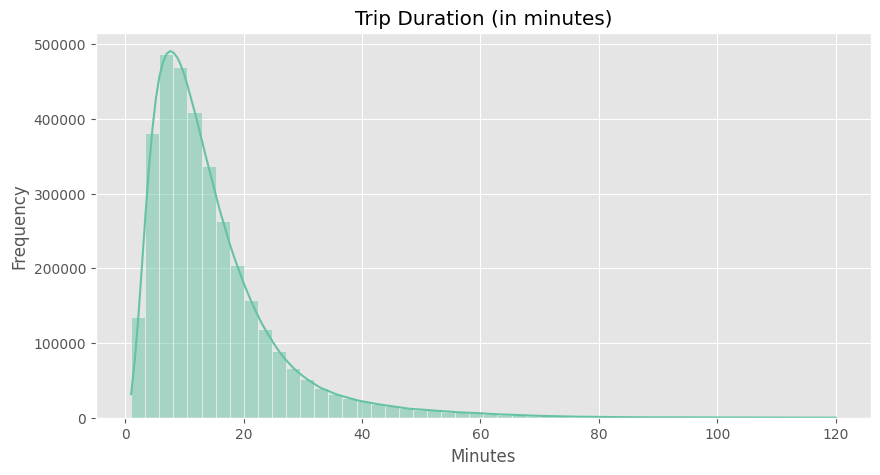

In [ ]:
# 1. Trip Duration Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['trip_duration_min'], bins=50, kde=True)
plt.title("Trip Duration (in minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


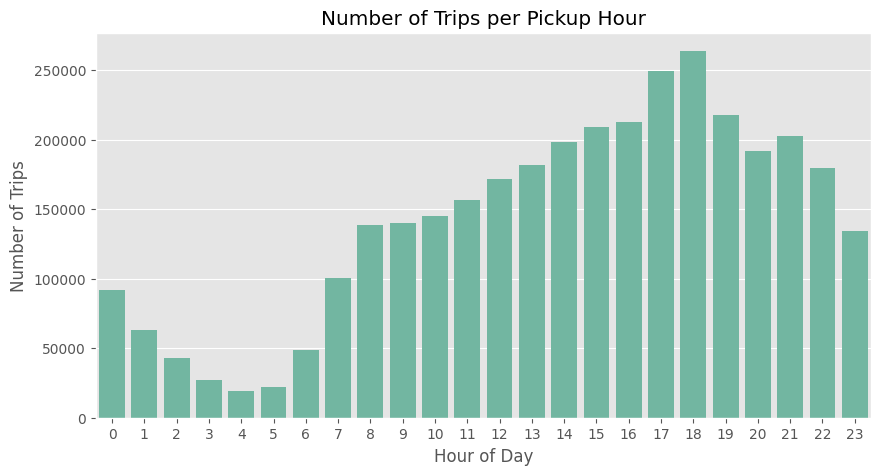

In [ ]:
# 2. Trips per Pickup Hour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='pickup_hour')
plt.title("Number of Trips per Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


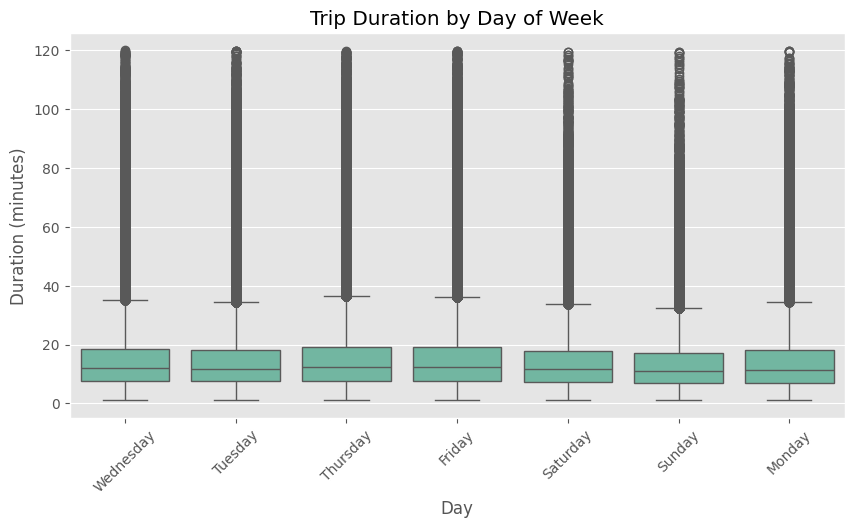

In [ ]:
# 3. Trip Duration by Day
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='pickup_day', y='trip_duration_min')
plt.title("Trip Duration by Day of Week")
plt.xlabel("Day")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.show()



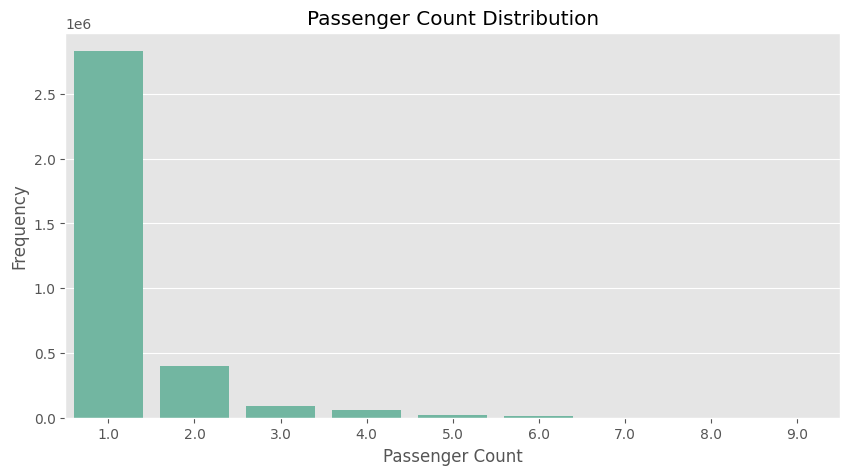

In [ ]:
# 4. Passenger Count Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='passenger_count')
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

